In [17]:
#installing pandas
!conda install -y pandas
!conda install -y pandas-datareader

Solving environment: done

## Package Plan ##

  environment location: /opt/miniconda3

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-1.1.3               |   py38hb1e8313_0         8.0 MB
    ------------------------------------------------------------
                                           Total:         8.0 MB

The following packages will be UPDATED:

  pandas                               1.1.1-py38hb1e8313_0 --> 1.1.3-py38hb1e8313_0



pandas-1.1.3         | 8.0 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

# All requested packages already installed.



In [18]:
import pandas as pd
%matplotlib inline

In [19]:
#Reading data from a csv file
google = pd.read_csv('goog.csv',index_col='Date', parse_dates=True)
google

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN
2010-01-05,313.28,313.61,310.46,311.68,NaN
2010-01-06,312.62,312.62,302.88,303.83,NaN
2010-01-07,304.40,304.70,296.03,296.75,NaN
2010-01-08,295.70,301.32,294.26,300.71,NaN
...,...,...,...,...,...
2014-12-24,530.51,531.76,527.02,528.77,704035.0
2014-12-26,528.77,534.25,527.31,534.03,1037727.0
2014-12-29,532.19,535.48,530.01,530.33,2276104.0


In [22]:
#Reading data from the web, this is another way to get the dataset, not necessary in this case as we have the csv file
# from pandas_datareader import data as pd_data
# start = pd.Timestamp('2010-1-1')
# end = pd.Timestamp('2014-12-31')
# google = pd_data.DataReader("GOOG", 'google', start, end)

In [23]:
type(google)

pandas.core.frame.DataFrame

In [26]:
google.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN
2010-01-05,313.28,313.61,310.46,311.68,NaN
2010-01-06,312.62,312.62,302.88,303.83,NaN
2010-01-07,304.40,304.70,296.03,296.75,NaN
2010-01-08,295.70,301.32,294.26,300.71,NaN


In [28]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2010-01-04 to 2014-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  194 non-null    float64
dtypes: float64(5)
memory usage: 58.9 KB


Data Indexing

In [30]:
#Pandas dataframes have special index, goes beyond integer indexing
# they are indexed by colun label, then row index
google['Open']

Date
2010-01-04    313.16
2010-01-05    313.28
2010-01-06    312.62
2010-01-07    304.40
2010-01-08    295.70
               ...  
2014-12-24    530.51
2014-12-26    528.77
2014-12-29    532.19
2014-12-30    528.09
2014-12-31    531.25
Name: Open, Length: 1257, dtype: float64

In [31]:
#inspect the first 5 rows or the 'Open' column, using integer indexing

google['Open'].iloc[0:5]

Date
2010-01-04    313.16
2010-01-05    313.28
2010-01-06    312.62
2010-01-07    304.40
2010-01-08    295.70
Name: Open, dtype: float64

In [33]:
# Inspect the first 5 rows or the 'Open' column, using date indexing

google.loc['2014-12-24':'2014-12-31','Open']

Date
2014-12-24    530.51
2014-12-26    528.77
2014-12-29    532.19
2014-12-30    528.09
2014-12-31    531.25
Name: Open, dtype: float64

Data Filtering


In [35]:
#Filtering by conditional
google_up = google[google['Close'] > google['Open']]
google_up.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-08,295.70,301.32,294.26,300.71,NaN
2010-01-13,287.96,293.90,286.66,293.25,NaN
2010-01-14,291.66,296.80,291.11,294.63,NaN
2010-01-19,290.45,294.91,287.86,293.52,NaN
2010-01-26,268.72,274.53,267.88,270.94,NaN


In [36]:
google_filtered = google[pd.isnull(google['Volume']) == False]
google_filtered.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-03-27,564.86,565.40,550.50,556.58,3826676.0
2014-03-28,558.94,566.03,558.33,559.51,2258918.0
2014-03-31,564.63,566.93,555.87,556.70,1942277.0
2014-04-01,559.57,568.18,558.44,566.88,2182626.0
2014-04-02,282.43,571.83,561.44,566.98,2088804.0


## Data Statistics
In Pandas we can very easily perform many types of statistical operations



In [37]:
google.describe()

,Open,High,Low,Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.940000e+02
mean,375.275593,378.450247,372.132474,375.327064,1.937264e+06
std,115.684354,116.288827,114.935742,115.664301,9.842775e+05
min,218.940000,220.920000,216.600000,217.820000,7.040350e+05
25%,285.790000,288.760000,283.060000,285.450000,1.338451e+06
50%,318.330000,320.800000,315.180000,317.260000,1.684634e+06
75%,452.540000,456.020000,449.740000,452.830000,2.164369e+06
max,612.790000,613.830000,608.690000,609.470000,6.795393e+06


## Data Computations

One simple example motivated by finance is to compute the "volatility" -- the rolling standard deviation of the log-return over the business days of the year.

First we use the pandas method .pct_change() to compute the return per day based on percent change. 
Next we use numpy to compute the log of the return. Finally we use pandas method .rolling_std() to compute the volatility

In [39]:
# Compute the returns from daily percent change
# Append a new column
google['Return'] = google['Close'].pct_change()
google['Return'].iloc[0:5]

Date
2010-01-04         NaN
2010-01-05   -0.004408
2010-01-06   -0.025186
2010-01-07   -0.023303
2010-01-08    0.013345
Name: Return, dtype: float64

In [47]:
# Compute the log() of the return using numpy
# Append another new column
import numpy as np
google['LogReturn'] = np.log(1+google['Return'])
google['LogReturn'].iloc[0:5]

Date
2010-01-04         NaN
2010-01-05   -0.004418
2010-01-06   -0.025509
2010-01-07   -0.023578
2010-01-08    0.013256
Name: LogReturn, dtype: float64

In [52]:
# Compute volatility as rolling standard deviation of the log() of the returns
# Append yet another new column
import pandas as pd

window_size = 252
# google['Volatility'] = pd.rolling_std(google['LogReturn'], window=window_size) * np.sqrt(window_size)
google['Volatility'] = google['LogReturn'].rolling(window=window_size).std() * np.sqrt(window_size)                                                                                        
google['Volatility'].iloc[window_size-5:window_size+5]

Date
2010-12-28         NaN
2010-12-29         NaN
2010-12-30         NaN
2010-12-31         NaN
2011-01-03         NaN
2011-01-04    0.278561
2011-01-05    0.278770
2011-01-06    0.277694
2011-01-07    0.276720
2011-01-10    0.276432
Name: Volatility, dtype: float64

In [53]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2010-01-04 to 2014-12-31
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1257 non-null   float64
 1   High        1257 non-null   float64
 2   Low         1257 non-null   float64
 3   Close       1257 non-null   float64
 4   Volume      194 non-null    float64
 5   Return      1256 non-null   float64
 6   LogReturn   1256 non-null   float64
 7   Volatility  1005 non-null   float64
dtypes: float64(8)
memory usage: 128.4 KB


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

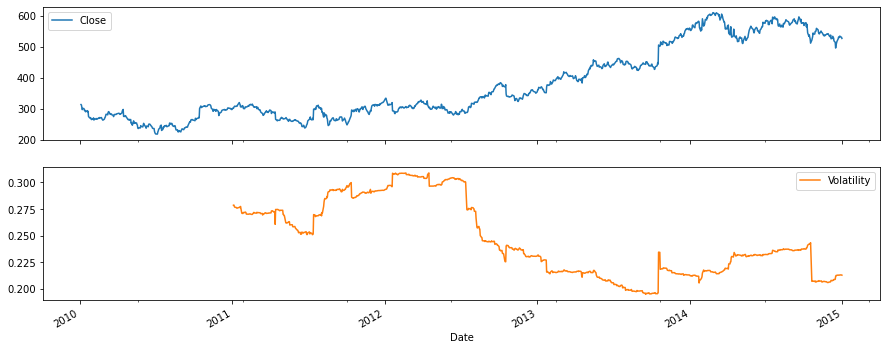

In [54]:

google[['Close','Volatility']].plot(subplots=True, figsize=(15,6))

## Pandas Data Structures: How we work with Data

Pandas provides two primary data structures:

- Series is built for 1-dimensional series data
- DataFrame is built for 2-dimensional collections of tabular data
These data structures differ and are related as follows:

- Series: 1-dimensional array of homogeneous data
- DataFrame: 2-dimensional table of heterogeneous data, composed of multiple Series

Each of these also contains an integrated index:

- Series objects include a second array called the index that can contain homogeneous values of any type like integers, strings or datetime objects.
- DataFrame objects include a column index. The index objects allow for very sophisticated selection operations using square brackets ([]) along with some specialized selection functions.

side note: Pandas has another data structure called Panels which is not commonly used


## Set-up

In [55]:
# Numerical computing
import numpy as np

# Draw pictures!
import matplotlib.pyplot as plt
%matplotlib inline

# Python people are weird!
import pandas as pd

# Set Jupyter notebook display options
pd.options.display.max_rows = 8
pd.options.display.max_columns = 8

## Pandas Series
- Designed for 1-dimensional, homogeneous series data
- Composed of an array of data and an special Index object
- Access to data contents can be done by position index (0,1,2,...) or by label index ('a','b','c',...)
- Index label type can be integers, strings, or datetime objects.
- Operations like retrieving, joining, and aligning data are made easy.

In [56]:
# Example: Creating a Series from a data column from file

file   = "exoplanets.csv"
data   = pd.read_csv(file)
series = data['NAME']

print( "\n" )
print( series )

print( "\n" )
print( type( series ) )



0          gamma Cep b
1          HD 114762 b
2       PSR B1257+12 B
3       PSR B1257+12 A
             ...      
1638         WASP-89 b
1639         HD 1666 b
1640        HD 95127 b
1641      Kepler-432 c
Name: NAME, Length: 1642, dtype: object


<class 'pandas.core.series.Series'>


In [61]:
# Example: Creating a Series a list

new_list = [5,10,15,20,25]
pd.Series(new_list)

0     5
1    10
2    15
3    20
4    25
dtype: int64

In [62]:
# Example: Creating a Series from a dictionary... index will be sorted

new_dictionary = {'b': 100, 'a': 200.0, 'd':450, 'c':700}
pd.Series(new_dictionary)


b    100.0
a    200.0
d    450.0
c    700.0
dtype: float64

In [63]:
# Example: Creating a Series from a NumPy array

array1  = np.arange(1,6)*10.0
series1 = pd.Series(array1)

print( "\n" )
print( array1 )
print( type(array1) )

print( "\n" )
print( series1 )
print( type(series1) )



[10. 20. 30. 40. 50.]
<class 'numpy.ndarray'>


0    10.0
1    20.0
2    30.0
3    40.0
4    50.0
dtype: float64
<class 'pandas.core.series.Series'>


In [64]:
# The default Index is just a sequence of integers:
array1  = np.arange(1,6)*10.0
series1 = pd.Series(array1)

series1.index

RangeIndex(start=0, stop=5, step=1)

In [65]:
# The Index is used for indexing

print( series1.iloc[0] )  # "Positional" indexing


10.0


In [66]:
# The Index can be set to a sequence of labels:

index2 = ['a','b','c','d','a']
series2 = pd.Series(np.arange(1,6)*10.0, index=index2)

In [67]:
# The Index labels are used for indexing

series2.loc['b']  # "label" indexing

20.0

In [68]:
# Indexing when the label is not unique?

series2.loc['a']

a    10.0
a    50.0
dtype: float64

## Iterating over a Series

In [69]:
for key, value in series2.iteritems():
    print(key, value)

a 10.0
b 20.0
c 30.0
d 40.0
a 50.0


## Pandas Slicing

In [71]:
# Positional indexing and slicing

series1.iloc[1:3]


1    20.0
2    30.0
dtype: float64

In [72]:
# Be careful when slicing with integers versus labels

print( series2.iloc[1:2]     )  # Positional indexing is permitted with slicing
print("\n")
print( series2.loc['b':'c'] )  # Ranges of labels can be sliced (slicing here is *inclusive*)

b    20.0
dtype: float64


b    20.0
c    30.0
dtype: float64


In [73]:
# Example: slice from the end
series2.iloc[-1:]


a    50.0
dtype: float64

In [74]:

# Example: slice from the beginning
series2.iloc[:-3]


a    10.0
b    20.0
dtype: float64

In [75]:

# Example: slice with labels, but with integer step size
series2.loc['d':'b':-2]

d    40.0
b    20.0
dtype: float64

## Series Arithmetic


In [76]:
# Arithmetic with Series is as with numpy arrays
print(series1)

series2 = series1 * 2 
print(series2)

series3 = series2 * 3
print(series3)

0    10.0
1    20.0
2    30.0
3    40.0
4    50.0
dtype: float64
0     20.0
1     40.0
2     60.0
3     80.0
4    100.0
dtype: float64
0     60.0
1    120.0
2    180.0
3    240.0
4    300.0
dtype: float64


## Series with NumPy 

In [78]:
# numpy ufuncs can be applied elementwise to Series

series_2pi = pd.Series( np.linspace(-1*np.pi, +1*np.pi, 100) )
series_2pi

0    -3.141593
1    -3.078126
2    -3.014660
3    -2.951193
        ...   
96    2.951193
97    3.014660
98    3.078126
99    3.141593
Length: 100, dtype: float64

In [79]:
# Even though pandas was built on numpy, numpy methods on Series return a Series

series_sin = np.sin( series_2pi )
print( series_sin )
print( type( series_sin ) )

0    -1.224647e-16
1    -6.342392e-02
2    -1.265925e-01
3    -1.892512e-01
          ...     
96    1.892512e-01
97    1.265925e-01
98    6.342392e-02
99    1.224647e-16
Length: 100, dtype: float64
<class 'pandas.core.series.Series'>


## Series with Matplotlib

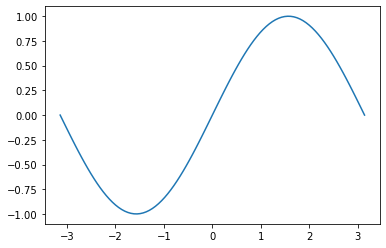

In [80]:
plt.plot(series_2pi, series_sin)

## Series Operations


In [81]:
# You can add two series

series1 = pd.Series([1,2,3,4,5])
print(series1)

series2 = pd.Series([10,20,30,40,50])
print(series2)

series3 = series1 + series2
print(series3)

0    1
1    2
2    3
3    4
4    5
dtype: int64
0    10
1    20
2    30
3    40
4    50
dtype: int64
0    11
1    22
2    33
3    44
4    55
dtype: int64


In [82]:
# Even better when you assign labels to your data!

series1 = pd.Series([1,2,3,4,5],      index=['a','b','c','d','e'])
series2 = pd.Series([10,20,30,40,50], index=['c','d','e','f','g'])

print( series1 + series2 )

a     NaN
b     NaN
c    13.0
d    24.0
e    35.0
f     NaN
g     NaN
dtype: float64


## SQL users: what just happened here ????

In [83]:
# So when you apply a method like mean(), the NaNs are handled intelligently...

(series1 + series2).mean()

24.0

In [84]:
# Contrast how NumPy and Pandas handle NaN:

print( "Pandas mean: ", pd.Series( [1.0, 2.0, np.nan] ).mean() )
print( "Numpy mean:  ", np.array(  [1.0, 2.0, np.nan] ).mean() )


Pandas mean:  1.5
Numpy mean:   nan



## Pandas DataFrame
What is a DataFrame?

- 2-dimensional labled tabular data (think spreadsheet or SQL table)
- heterogeneous data, composed of multiple Series
- an Index or "row label" for selection operations

DataFrame inputs:

- python dict of 1D sequences (e.g. ndarrays, lists, dicts, or Series)
- 2-D numpy.ndarray
- pandas Series
- another DataFrame
DataFrame Operations:

- Pandas DataFrame objects have column names:
    - dictionary style: df['DATE']
    - attribute style: df.DATE
- DataFrame binary operations (+ - / *) defaults to outer join, on both columns as well as the index
- NaN can be handled after join

In [86]:
# Creating a DataFrame from a file read:

file    = "exoplanets.csv"
df_file = pd.read_csv(file)
df_file

,NAME,FIRSTREF,FIRSTURL,DATE,...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
0,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,1988,...,+23:39:20.98,+77:37:55.08,1.260000,5.010000
1,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,1989,...,+13:12:20.10,+17:31:01.66,0.894578,0.859205
2,PSR B1257+12 B,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,1992,...,13:00:03.577,+12:40:56.4,NaN,NaN
3,PSR B1257+12 A,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,1992,...,13:00:03.577,+12:40:56.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1638,WASP-89 b,Hellier 2015,http://adsabs.harvard.edu/abs/2015AJ....150...18H,2015,...,20:55:35.98,-18:58:16.1,0.920000,0.880000
1639,HD 1666 b,Harakawa 2015,http://adsabs.harvard.edu/abs/2015ApJ...806....5H,2015,...,+00:20:52.34,-19:55:51.89,1.500000,1.930000
1640,HD 95127 b,Niedzielski 2015,http://adsabs.harvard.edu/abs/2015ApJ...803....1N,2015,...,+10:59:35.10,+43:48:52.17,1.200000,20.000000
1641,Kepler-432 c,Ciceri 2015,http://adsabs.harvard.edu/abs/2015A%26A...573L...,2015,...,19:33:07.729,+48:17:09.,1.320000,4.060000


In [87]:
# Creating a DataFrame from a dictionary

dictionary = {'a':[1,2,3,4,5,6,7,8,9,10],
              'b':np.linspace(0,np.pi,10),
              'c':0.0,
              'd':["a","b","c","a","b","c","a","b","c","a"]}

df_dict = pd.DataFrame(dictionary)
df_dict

,a,b,c,d
0,1,0.000000,0.0,a
1,2,0.349066,0.0,b
2,3,0.698132,0.0,c
3,4,1.047198,0.0,a
...,...,...,...,...
6,7,2.094395,0.0,a
7,8,2.443461,0.0,b
8,9,2.792527,0.0,c
9,10,3.141593,0.0,a


In [88]:
# Inspect the DataFrame colums and index
df_dict.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

In [89]:
df_dict.index

RangeIndex(start=0, stop=10, step=1)

In [90]:
df_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       10 non-null     int64  
 1   b       10 non-null     float64
 2   c       10 non-null     float64
 3   d       10 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes


## DataFrame Indexing
- Pandas DataFrames have a special Index, goes beyond integer indexing
- Pandas DataFrames are indexed by column label, then (row) Index:

In [91]:
df_grades = pd.DataFrame({'Alice' : [1,2,3,4,5], 
                         'Bob':np.random.random(5), 
                         'Chuck' : np.random.random(5)},
                         index=['Jan', 'Feb', 'Mar', 'Apr', 'May'])
df_grades

,Alice,Bob,Chuck
Jan,1,0.970430,0.343972
Feb,2,0.124420,0.379776
Mar,3,0.518378,0.447563
Apr,4,0.925748,0.372700
May,5,0.357635,0.813104


In [92]:
# Indexing is by column first (gives a Series)
series_a = df_grades['Alice']

print( series_a )
print( type(series_a) )


Jan    1
Feb    2
Mar    3
Apr    4
May    5
Name: Alice, dtype: int64
<class 'pandas.core.series.Series'>


In [93]:
# Indexing the column name, gives a Series, then 'positional' indexing
df_grades['Alice'].iloc[1]


2

In [94]:
# Indexing the column name, gives a Series, then 'label' indexing
df_grades.loc['Jan','Alice']


1

## Iterating over a DataFrame

As seen with Series, we can iterate over DataFrames

In [95]:
for key, value in df_grades['Alice'].iteritems():
    print('Key:', '%s' % key, ', Value:', '%s' % value)

Key: Jan , Value: 1
Key: Feb , Value: 2
Key: Mar , Value: 3
Key: Apr , Value: 4
Key: May , Value: 5



DataFrames support iteration over the Index

In [96]:
for index, row in df_grades.iterrows():
    print('Index:', '%s' % index, ', Row:', '%s' % row['Alice'])

Index: Jan , Row: 1.0
Index: Feb , Row: 2.0
Index: Mar , Row: 3.0
Index: Apr , Row: 4.0
Index: May , Row: 5.0


## DataFrame Manipulation 

This is just a brief introduction working with DataFrames. There's a lot more to learn...

In [97]:
# Extract a column as a new DataFrame (instead of a series as in df_grades['Alice']).
df_col = df_grades[['Alice']]
print( df_col, "\n", type(df_col) )

     Alice
Jan      1
Feb      2
Mar      3
Apr      4
May      5 
 <class 'pandas.core.frame.DataFrame'>


In [98]:
# Extract a row as a new DataFrame
df_row = df_grades.loc['Jan':'Jan']
print( df_row, "\n", type(df_row) )

     Alice      Bob     Chuck
Jan      1  0.97043  0.343972 
 <class 'pandas.core.frame.DataFrame'>


In [99]:
# Slicing along rows works just as with Series
df_grades.loc['Jan':'Mar','Alice']

Jan    1
Feb    2
Mar    3
Name: Alice, dtype: int64

In [100]:
# For column range, need to use the .ix attribute of the DataFrame
df_grades.loc[:,'Alice':'Bob']

,Alice,Bob
Jan,1,0.970430
Feb,2,0.124420
Mar,3,0.518378
Apr,4,0.925748
May,5,0.357635


In [101]:
# For extracting row and column ranges
df_grades.loc['Mar':'Apr', 'Bob':'Chuck']

,Bob,Chuck
Mar,0.518378,0.447563
Apr,0.925748,0.372700


In [102]:
# Boolean masks work too
df_grades.loc[df_grades['Bob'] < .5]

,Alice,Bob,Chuck
Feb,2,0.124420,0.379776
May,5,0.357635,0.813104


In [103]:
# Pandas DataFrames can be cast to other types

my_list  = list(df_grades['Alice'])
print( my_list, type(my_list) )

my_array = np.array(df_grades['Alice'])
print( my_array, type(my_array) )

[1, 2, 3, 4, 5] <class 'list'>
[1 2 3 4 5] <class 'numpy.ndarray'>
